In [2]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
import enzope
from enzope.graphs.graph_class import GTG
import os

In [3]:
figpath = os.path.join(os.getcwd(), 'figs')

In [4]:
posi = {i: [np.random.uniform(0, 1), np.random.uniform(0, 1)] for i in range(100)}

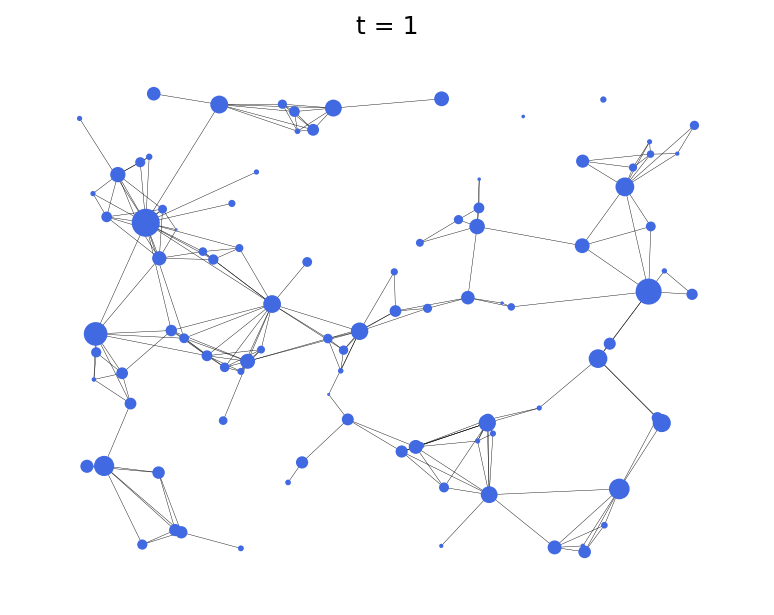

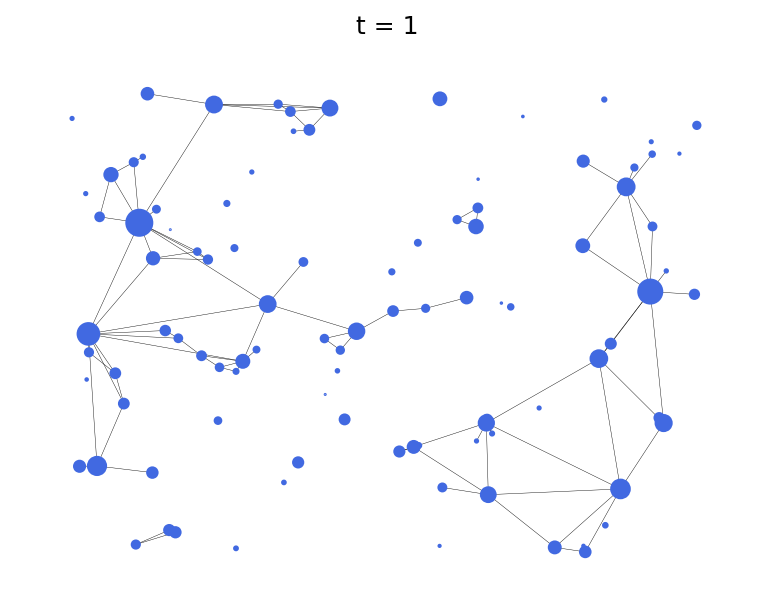

In [4]:
n_nodes = 100
w0 = {i: .5 for i in range(n_nodes)}
g = GTG(n_nodes, theta=100, posi=posi, seed=9, plotable=True)
g2 = GTG(n_nodes, theta=100, posi=posi, join="mul", seed=9, plotable=True)
plot_margin = 0.25

g.plot_snapshot(mcs=1)
g2.plot_snapshot(mcs=1)
# g.fig.savefig(os.path.join(figpath, 'paso3_theta=5e1.png'), dpi=300, transparent=True)

In [13]:
weights = dict(enumerate((np.random.default_rng().pareto(a, n_nodes) + 1) * m))

(7.48, 12.92012383841579)


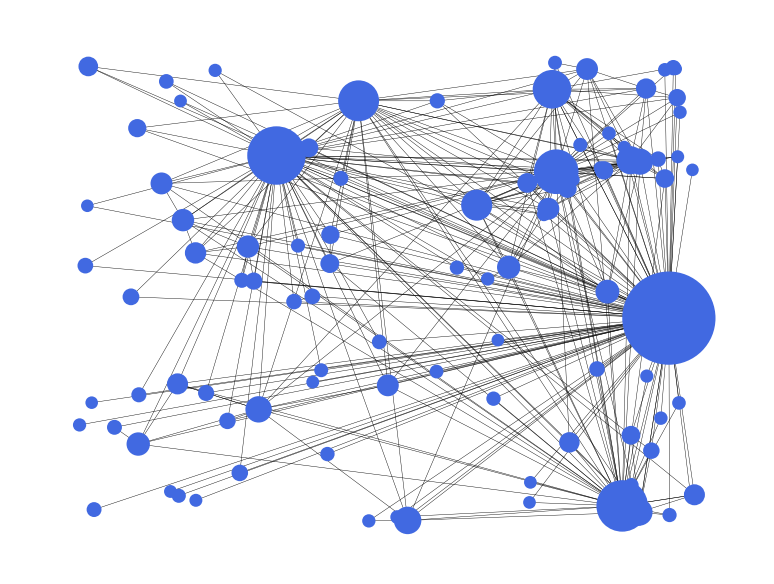

In [20]:
n_nodes = 100
theta = 80
a = 1.5
m = 1
# Par weights
g1 = GTG(n_nodes, theta=theta, w0=weights, posi=posi, seed=23, p_dist=enzope.measures.r1, join='mul', plotable=True)
print(g1.get_mean_degree())
g1.plot_snapshot()
g1.fig.savefig(os.path.join(figpath, 'muestra_mul_par_r1.svg'), transparent=True)

#### Plots para la trefemac

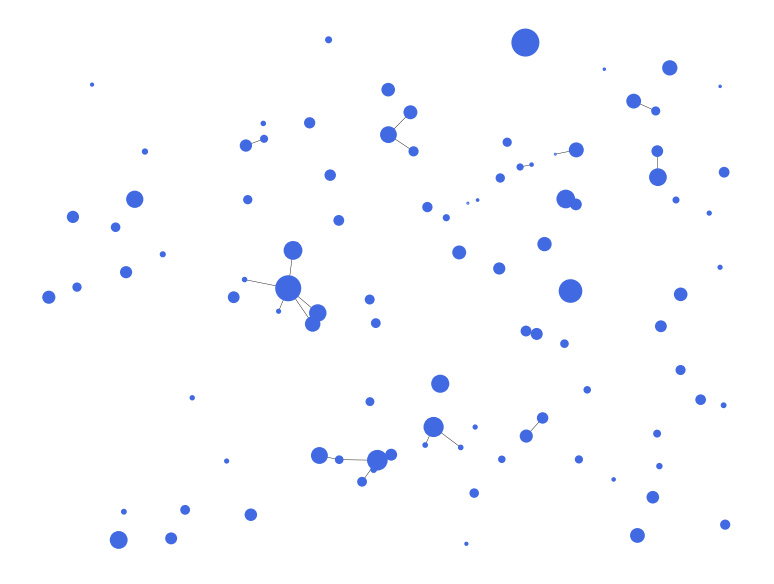

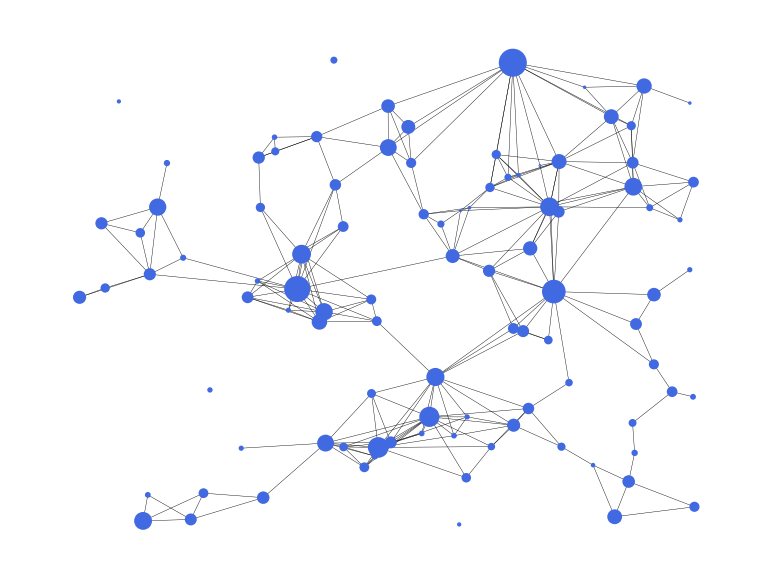

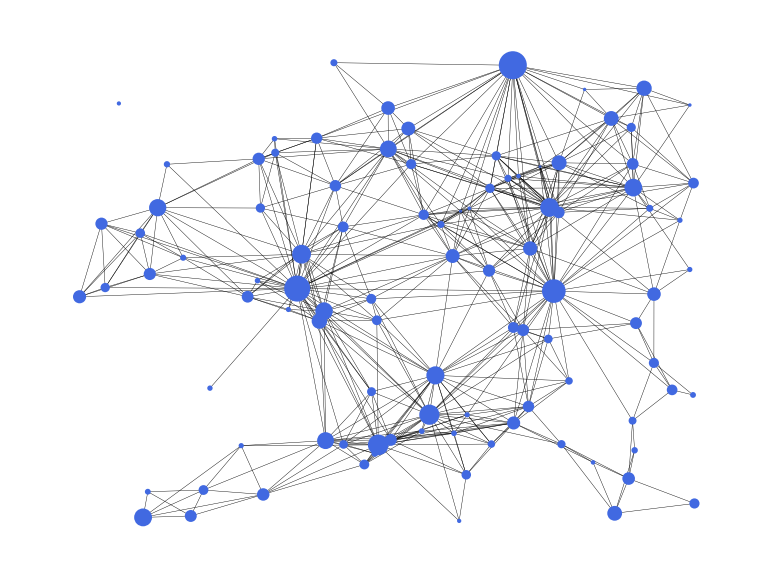

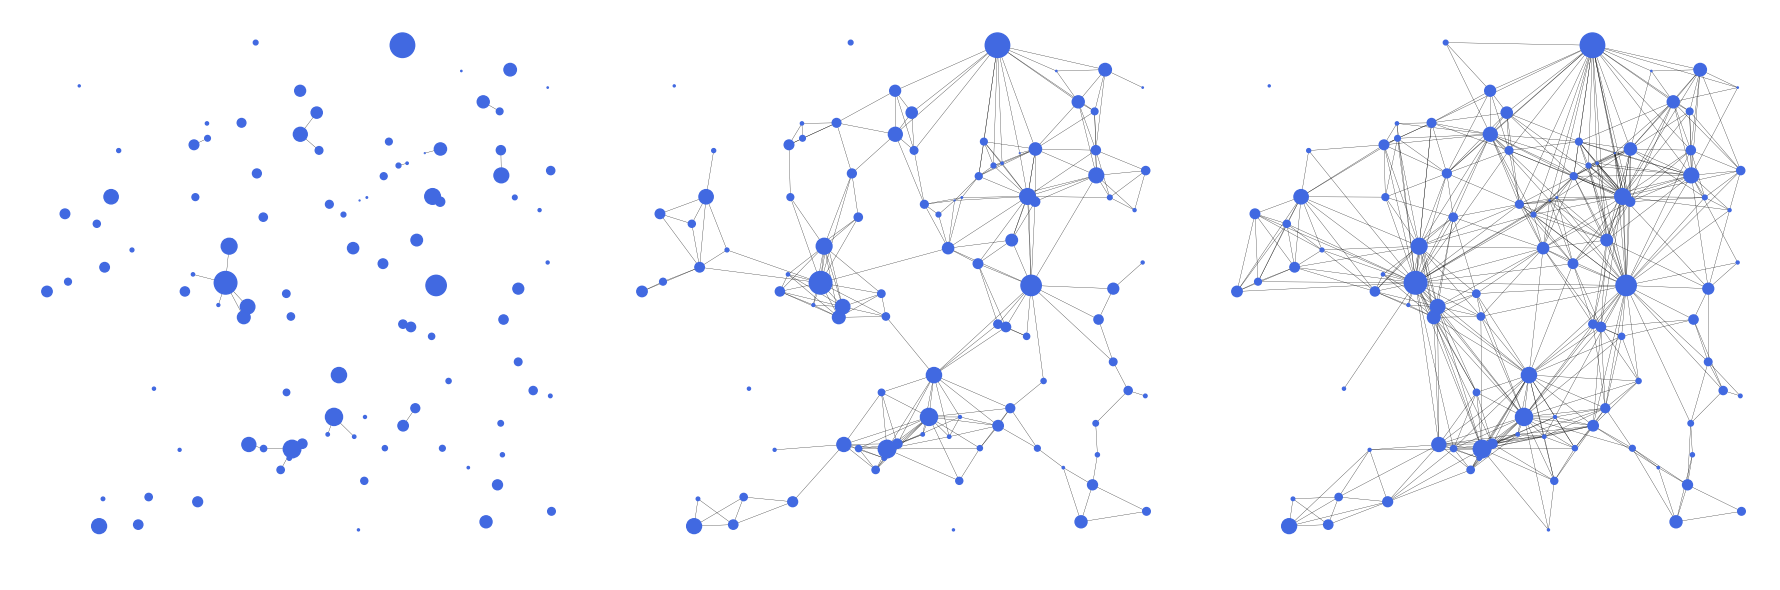

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import random
from enzope.graphs.graph_class import GTG

posi = {i: [np.random.uniform(0, 1), np.random.uniform(0, 1)] for i in range(100)}
n_nodes = 100
# w = {i: random.expovariate(1.0) for i in range(n_nodes)}
g = GTG(n_nodes, theta=100, posi=posi, seed=9, plotable=True)
g2 = GTG(n_nodes, theta=100, posi=posi, join="mul", seed=9, plotable=True)

graphs = [GTG(n_nodes, theta=1000, posi=posi, seed=9, plotable=True), GTG(n_nodes, theta=100, posi=posi, seed=9, plotable=True), GTG(n_nodes, theta=50, posi=posi, seed=9, plotable=True)]

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), linewidth=10)  # Adjust figsize as needed

# Plot each graph on its corresponding subplot
for i, G in enumerate(graphs):
    ax = axes[i]
    ax.set_aspect('equal')  # Set aspect ratio to be equal
    ax = graphs[i].plot_snapshot()
    w0 = dict(enumerate(G.G.nodes[i]["weight"] for i in range(n_nodes)))
    a = np.array(list(w0.values()))

    node_size = 50 * (a)
    node_colors = ["royalblue" for _ in graphs[i].G.nodes]

    nx.draw(
        graphs[i].G,
        node_size=node_size,
        width=0.2,
        pos=posi,
        node_color=node_colors,
        ax=axes[i],
    )
    axes[i].set_xlim(-.05, 1.05)  # Set x-axis limits
    axes[i].set_ylim(-.05, 1.05)  # Set y-axis limits
    # axes[i].set_frame_on(True)  # Turn on frame
    # axes[i].spines['top'].set_color('black')  # Top spine color
    # axes[i].spines['bottom'].set_color('black')  # Bottom spine color
    # axes[i].spines['left'].set_color('black')  # Left spine color
    # axes[i].spines['right'].set_color('black')  # Right spine color
    

# fig.savefig('graph_figure.pdf')
fig.savefig('graph_figure.svg')
plt.tight_layout()
plt.show()
